## ESTIMATING DEMAND FUNCTION FOR FISH IN SG WET MARKET

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats
import linearmodels.iv.model as lm

In [4]:
df = pd.read_csv('Fish Market Data.csv')
df

,Mon,Tue,Wed,Thu,Date,Stormy,Mixed,p,q,Rainy,Cold,Wind
0,1,0,0,0,911202,1,0,-0.430783,8.994421,1,0,2.995732
1,0,1,0,0,911203,1,0,0.000000,7.707063,0,0,2.995732
2,0,0,1,0,911204,0,1,0.072321,8.350194,1,1,2.813411
3,0,0,0,1,911205,1,0,0.247139,8.656955,0,1,3.036554
4,0,0,0,0,911206,1,0,0.664327,7.844241,0,1,3.036554
...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0,0,0,920504,0,0,-0.798508,8.610683,0,0,2.862201
107,0,1,0,0,920505,0,1,-0.087011,7.162397,0,0,2.908721
108,0,0,1,0,920506,0,1,0.184922,7.362010,0,0,2.862201
109,0,0,0,1,920507,0,1,0.223143,8.764053,0,0,2.813411


**Descriptive Analytics**

c:\Users\USER\anaconda3\envs\pythonenvakileis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\pythonenvakileis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\pythonenvakileis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\pythonenvakileis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

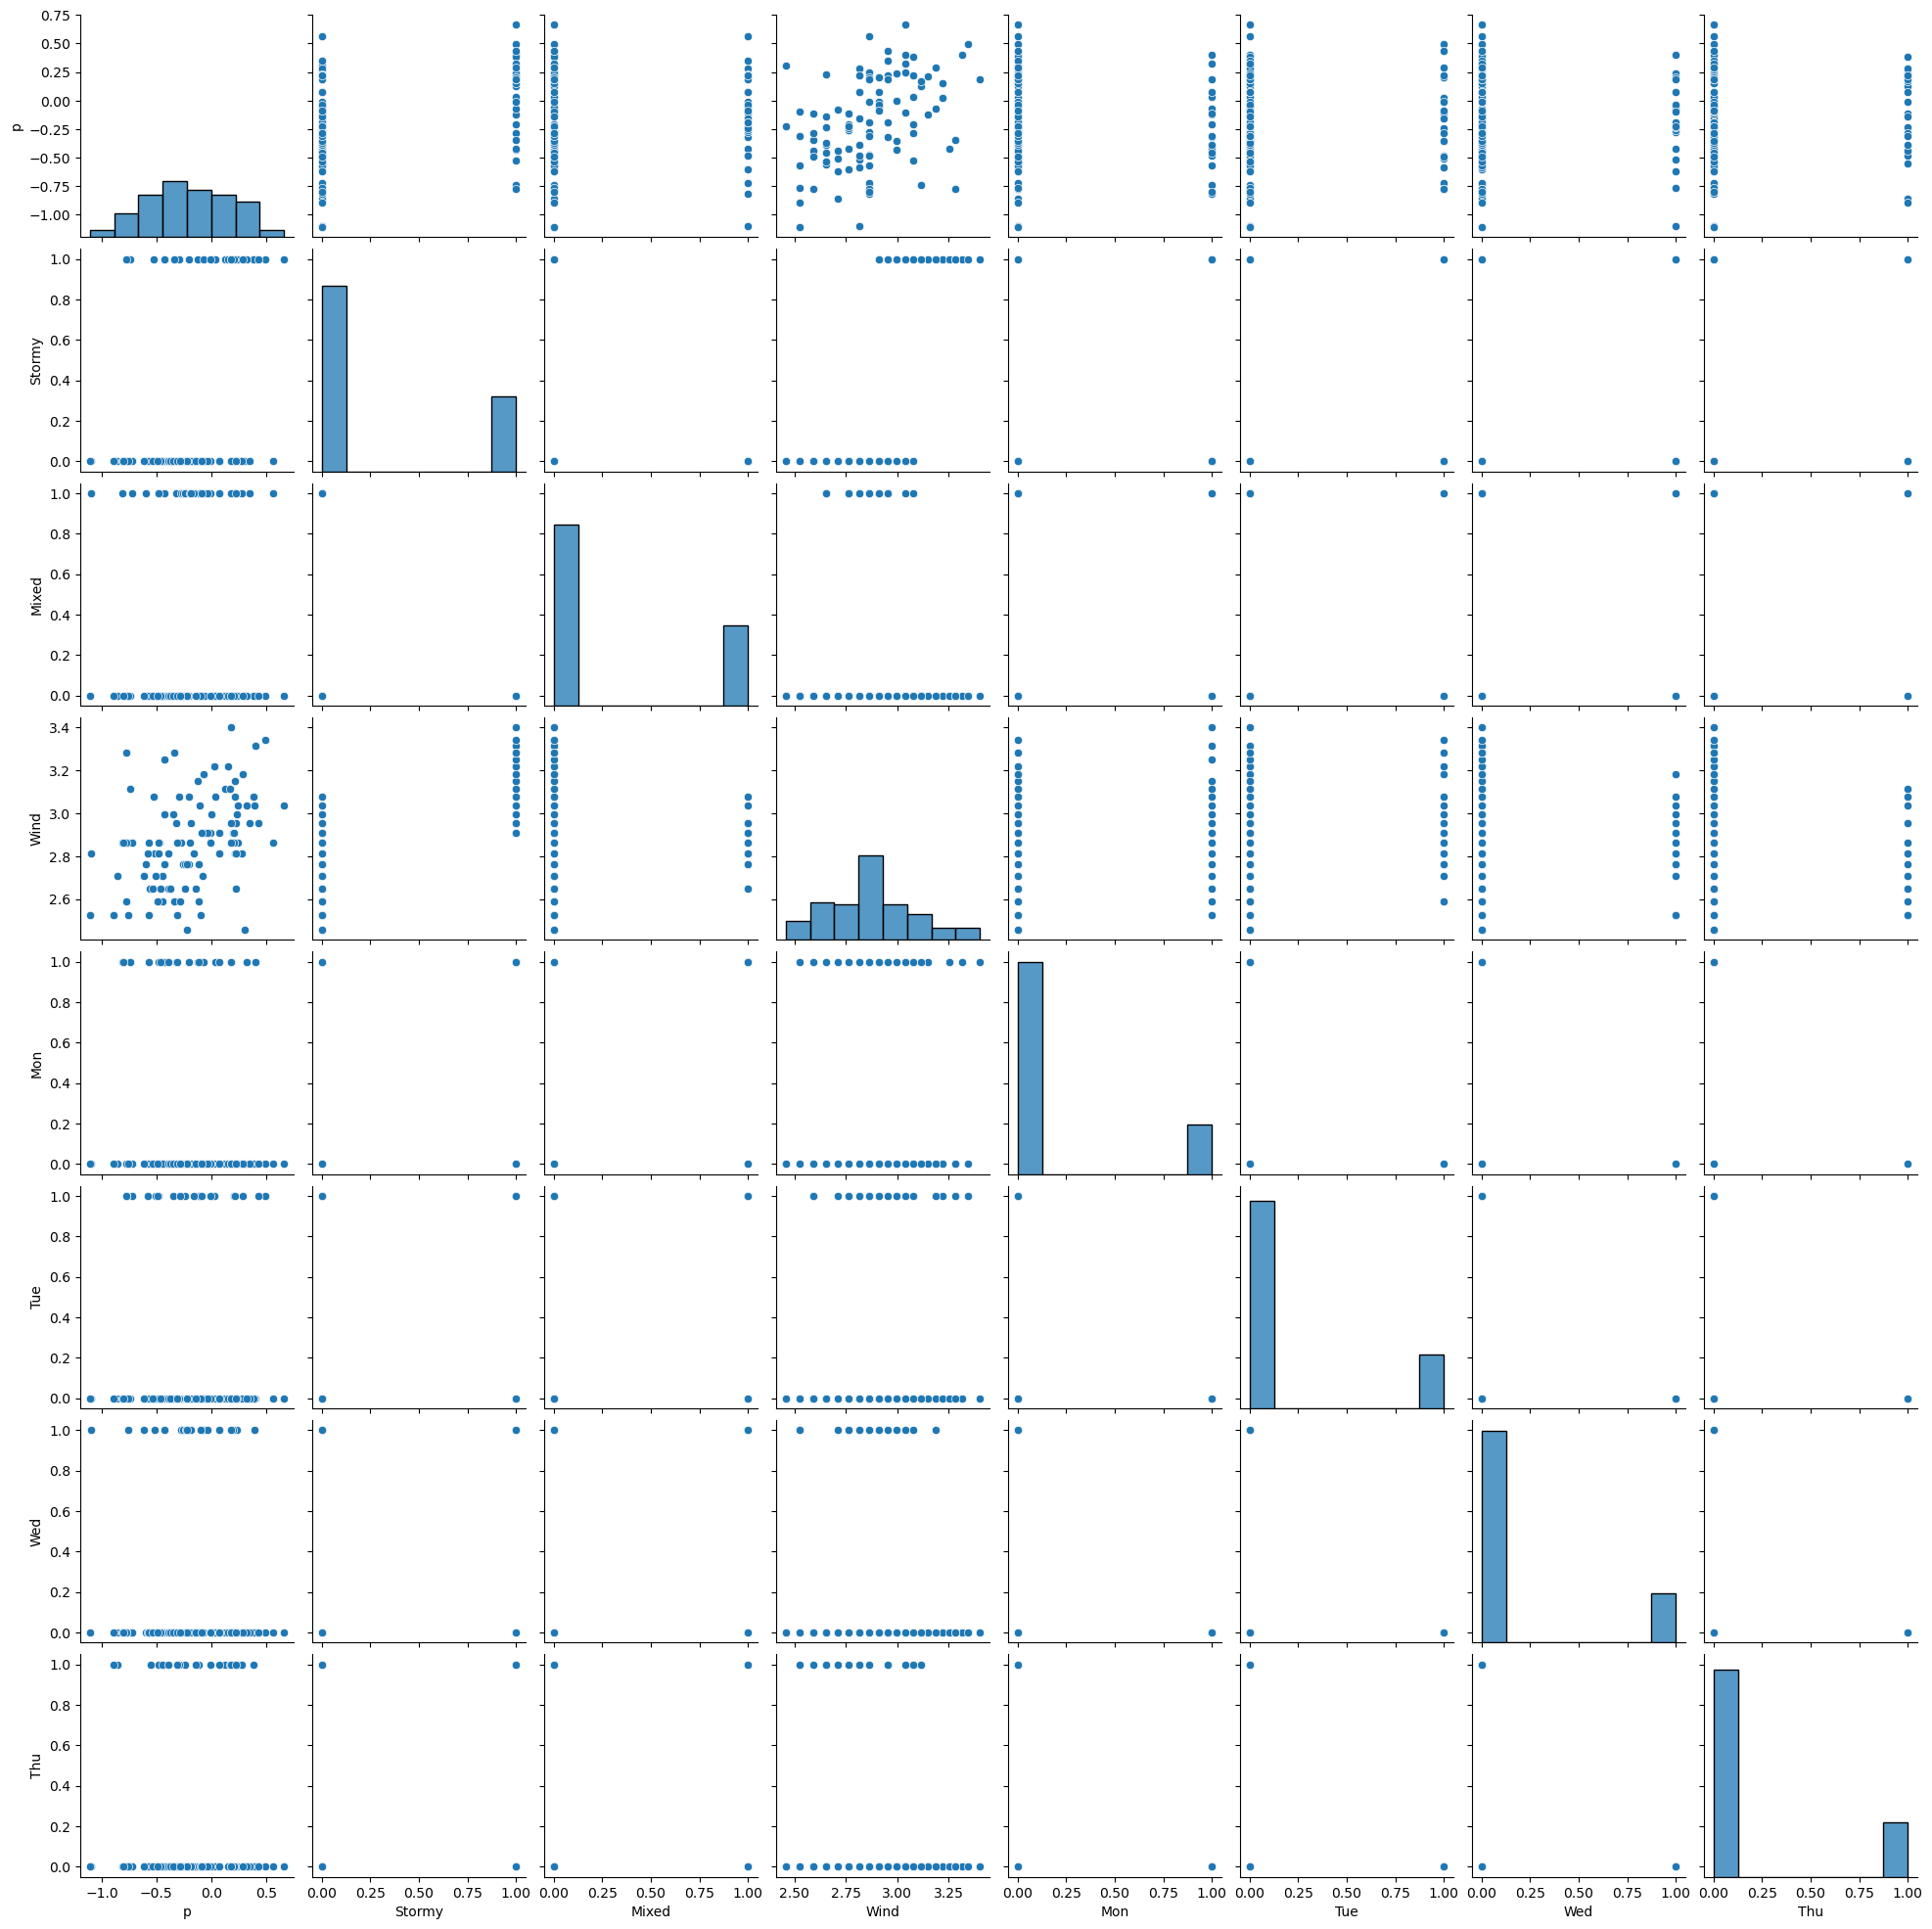

In [5]:
sns.pairplot(df[['p', 'Stormy', 'Mixed', 'Wind', 'Mon', 'Tue', 'Wed', 'Thu']])
plt.show()

# Model Selection and Estimation
X = df[['p', 'Stormy', 'Mixed', 'Wind', 'Mon', 'Tue', 'Wed', 'Thu']]
y = df['q']

c:\Users\USER\anaconda3\envs\pythonenvakileis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\pythonenvakileis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\AppData\Local\Temp\ipykernel_48788\1950372744.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='p', y='q', palette='viridis', alpha=0.5)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


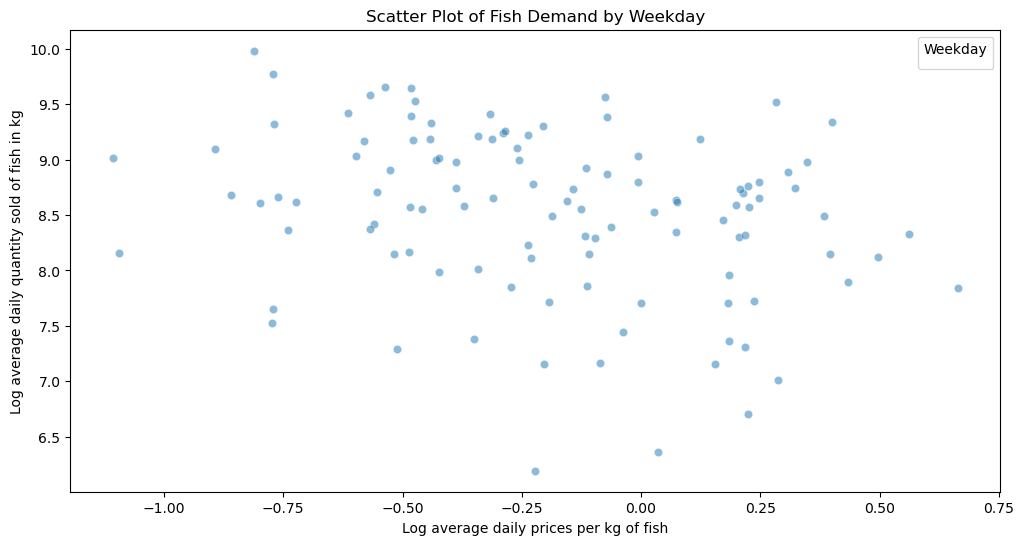

In [6]:
# Scatter Plot to Compare Features
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='p', y='q', palette='viridis', alpha=0.5)
plt.xlabel('Log average daily prices per kg of fish')
plt.ylabel('Log average daily quantity sold of fish in kg')
plt.title('Scatter Plot of Fish Demand by Weekday')
plt.legend(title='Weekday', loc='upper right')
plt.show()

In [7]:
# Exploring the dataset
import pandas as pd
import numpy as np
import statsmodels.api as sm
#import linearmodels.iv.model as lm

import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.read_csv('Data-GP1-1.csv') # Not needed here since read in from google drive above

df.isnull().values.any() #check for NAN

df.describe() # See statistics on df

,Mon,Tue,Wed,Thu,Date,Stormy,Mixed,p,q,Rainy,Cold,Wind
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.189189,0.207207,0.189189,0.207207,918566.675676,0.288288,0.306306,-0.193681,8.523430,0.162162,0.504505,2.862695
std,0.393435,0.407143,0.393435,0.407143,3568.817767,0.455020,0.463049,0.381935,0.741672,0.370271,0.502247,0.208632
min,0.000000,0.000000,0.000000,0.000000,911202.000000,0.000000,0.000000,-1.107745,6.194406,0.000000,0.000000,2.456736
25%,0.000000,0.000000,0.000000,0.000000,920111.500000,0.000000,0.000000,-0.479651,8.147429,0.000000,0.000000,2.708050
50%,0.000000,0.000000,0.000000,0.000000,920220.000000,0.000000,0.000000,-0.206514,8.621193,0.000000,1.000000,2.862201
75%,0.000000,0.000000,0.000000,0.000000,920330.500000,1.000000,1.000000,0.163000,9.035391,0.000000,1.000000,2.995732
max,1.000000,1.000000,1.000000,1.000000,920508.000000,1.000000,1.000000,0.664327,9.981374,1.000000,1.000000,3.401197


c:\Users\USER\anaconda3\envs\pythonenvakileis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\pythonenvakileis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


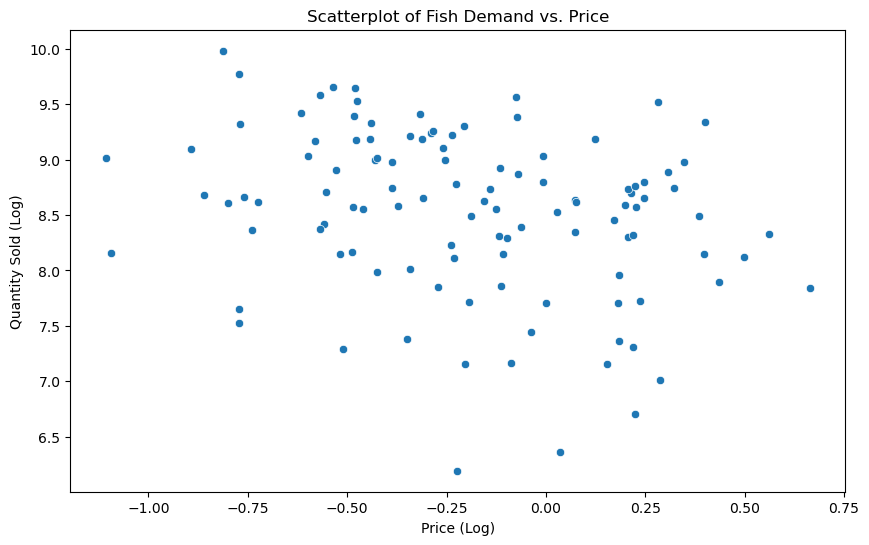

In [8]:
# Plot 2: Qty Sold vs Price (Scatter)
# As fish price is determined simultaneously by demand and supply, we expect multiple equilibria over different time periods, resulting in difficult estimating the demand curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x="p", y="q", data=df)
plt.title('Scatterplot of Fish Demand vs. Price')
plt.xlabel('Price (Log)')
plt.ylabel('Quantity Sold (Log)')
plt.show()

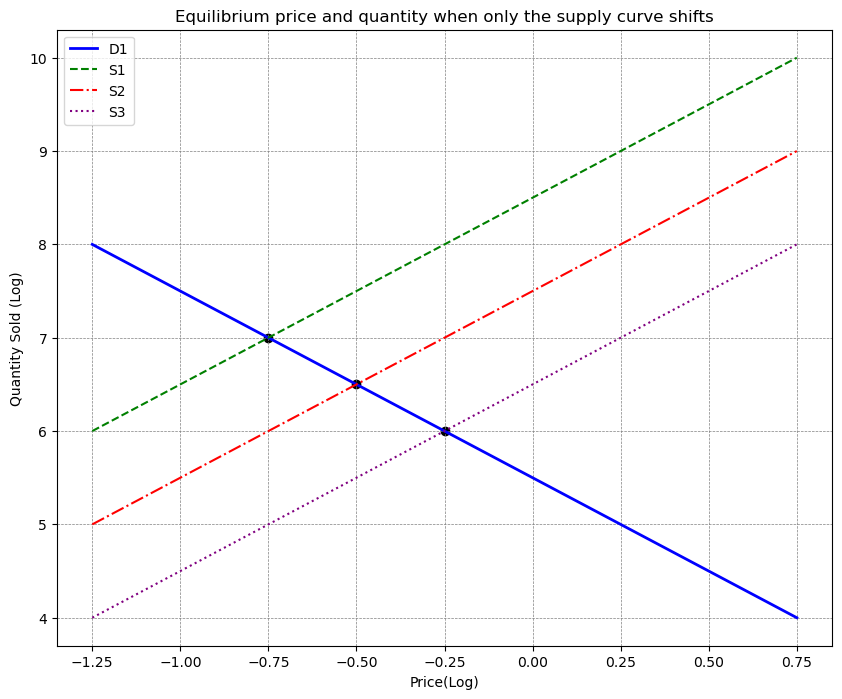

In [9]:
# Plot 3: Equilibrium price and quantity when only the supply curve shifts
# However, if we can find a variable that only affects supply and not demand, we can trace out the demand curve (D1) via shifts in the supply curve (S1 to S3).
# The diagram below illustrates this. Note: this diagram is only for illustration of the concept: the equations used are not based on the dataset provided.

import numpy as np
import matplotlib.pyplot as plt

# Create quantity and price values
quantity = np.linspace(6, 10, 100)
price = np.linspace(-1.25, 0.75, 100)

# Define the demand equation as a straight line
demand = 8 - 2 * (price + 1.25)  # Straight-line demand equation

# Define three parallel supply curves as straight lines
supply3 = 4 + 2 * (price + 1.25)
supply2 = 5 + 2 * (price + 1.25)
supply1 = 6 + 2 * (price + 1.25)

# Tntersection points
intersection1 = (-0.75,7)
intersection2 = (-0.5, 6.5)
intersection3 = (-0.25, 6)

# Plot
plt.figure(figsize=(10,8))
plt.plot(price, demand, label='D1', color='blue', linewidth=2)
plt.plot(price, supply1, label='S1', linestyle='--', color='green')
plt.plot(price, supply2, label='S2', linestyle='-.', color='red')
plt.plot(price, supply3, label='S3', linestyle=':', color='purple')

# Mark intersection points with dots
plt.scatter(*intersection1, color='black', marker='o')#, label='Intersection 1')
plt.scatter(*intersection2, color='black', marker='o')#, label='Intersection 2')
plt.scatter(*intersection3, color='black', marker='o')#, label='Intersection 3')

# Add labels and a legend
plt.xlabel('Price(Log)')
plt.ylabel('Quantity Sold (Log)')
plt.title('Equilibrium price and quantity when only the supply curve shifts')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


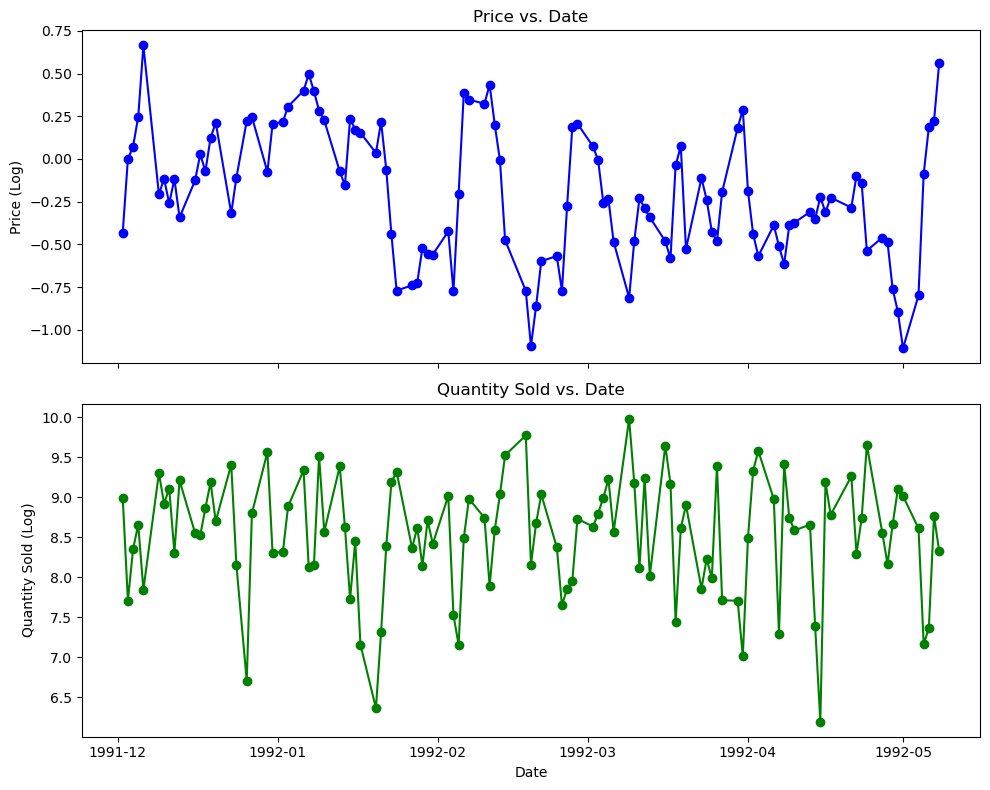

In [10]:
# Plot 3: Price over Time & Qty Sold over time
df['Date2'] = pd.to_datetime(df['Date'], format='%y%m%d') #Making date format readable

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# First subplot: p against date
ax1.plot(df['Date2'], df['p'], marker='o', linestyle='-', color='b')
ax1.set_title('Price vs. Date')
ax1.set_ylabel('Price (Log)')

# Second subplot: q against date
ax2.plot(df['Date2'], df['q'], marker='o', linestyle='-', color='g')
ax2.set_title('Quantity Sold vs. Date')
ax2.set_xlabel('Date')
ax2.set_ylabel('Quantity Sold (Log)')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

In [11]:
# Statistics for "q" across the different days
# Calculate statistics for 'q' across the days 'Mon', 'Tue', 'Wed', 'Thu', and 'Fri'
day_stats = df.groupby(['Mon', 'Tue', 'Wed', 'Thu'])['q'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

# Rename the columns for clarity
day_stats.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Mean', 'Median', 'Std', 'Min', 'Max']

# Print the statistics
print(day_stats)

   Mon  Tue  Wed  Thu      Mean    Median       Std       Min       Max
0    0    0    0    0  8.708905  8.779557  0.610666  7.156956  9.651816
1    0    0    0    1  8.762598  8.740336  0.602289  6.703188  9.518340
2    0    0    1    0  8.164622  8.158802  0.730208  6.194406  9.415728
3    0    1    0    0  8.207339  8.163371  0.759733  7.013916  9.773094
4    1    0    0    0  8.763345  8.744328  0.795121  6.363028  9.981374


In [12]:
# Statistics for "q" across the sea weather
# Calculate statistics for 'q' across the shore weather 'Stormy', "Mixed'
sea_stats = df.groupby(['Stormy', 'Mixed'])['q'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

sea_stats.columns = ['Stormy', 'Mixed', 'Mean', 'Median', 'Std', 'Min', 'Max'] # Rename the columns for clarity
print(sea_stats)

   Stormy  Mixed      Mean    Median       Std       Min       Max
0       0      0  8.714569  8.737132  0.693704  6.194406  9.773094
1       0      1  8.513532  8.594539  0.772817  6.703188  9.981374
2       1      0  8.265156  8.470476  0.714900  6.363028  9.336444


In [13]:
# Statsistics for "q" across the sea weather
# Calculate statistics for 'q' across the shore weather 'Stormy', "Mixed'
sea_stats = df.groupby(['Stormy', 'Mixed'])['q'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

sea_stats.columns = ['Stormy', 'Mixed', 'Mean', 'Median', 'Std', 'Min', 'Max'] # Rename the columns for clarity
print(sea_stats)

   Stormy  Mixed      Mean    Median       Std       Min       Max
0       0      0  8.714569  8.737132  0.693704  6.194406  9.773094
1       0      1  8.513532  8.594539  0.772817  6.703188  9.981374
2       1      0  8.265156  8.470476  0.714900  6.363028  9.336444


In [14]:
# Convert 'Date2' to a numeric format representing the number of days since '1991-12-02'
reference_date = pd.to_datetime('1991-12-02')
df['Date2_numeric'] = (df['Date2'] - reference_date).dt.days

correlation = df['q'].corr(df['Date2_numeric']) # Calculate the correlation
print("Correlation between 'q' and 'Date2_numeric':", correlation)

Correlation between 'q' and 'Date2_numeric': -0.04367929632209586


**OLS Regression Results**

In [15]:
# First Stage Regression
X_first_stage = df[['Stormy', 'Mixed', 'Wind',    # Sea Weather (IV)
                    'Mon', 'Tue', 'Wed', 'Thu',   # Market Days
                    'Rainy', 'Cold']]             # Market Weather
Y_first_stage = df['p']                           # 'price' is the intermediate variable to predict

# Add a constant (intercept) for the first stage
X_first_stage = sm.add_constant(X_first_stage)

# Fit the first stage regression model
model_first_stage = sm.OLS(Y_first_stage, X_first_stage).fit()

# Get the predicted values of 'p' from the first stage
df['p_hat'] = model_first_stage.predict(X_first_stage)  # Add 'p_hat' to the DataFrame

print(model_first_stage.summary())

                            OLS Regression Results                            
Dep. Variable:                      p   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     3.849
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           0.000323
Time:                        22:50:44   Log-Likelihood:                -33.795
No. Observations:                 111   AIC:                             87.59
Df Residuals:                     101   BIC:                             114.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9878      0.772     -1.279      0.2

In [16]:
# Second Stage Regression
X_second_stage = df[['p_hat',                      # predicted price
                     'Mon', 'Tue', 'Wed', 'Thu',   # day-of-the-week
                     'Rainy', 'Cold']]             # shore conditions
X_second_stage = sm.add_constant(X_second_stage)
y_second_stage = df['q']
second_stage_model = sm.OLS(y_second_stage, X_second_stage).fit()

# View the summary statistics of the second stage model
print(second_stage_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     3.628
Date:                Sat, 30 Mar 2024   Prob (F-statistic):            0.00155
Time:                        22:50:44   Log-Likelihood:                -111.60
No. Observations:                 111   AIC:                             239.2
Df Residuals:                     103   BIC:                             260.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5007      0.189     45.062      0.0

In [17]:
# Second Stage Regression : Part 1
X_second_stage = df[['p_hat']]   # predicted price
X_second_stage = sm.add_constant(X_second_stage)
y_second_stage = df['q']
second_stage_model = sm.OLS(y_second_stage, X_second_stage).fit()

# View the summary statistics of the second stage model
print(second_stage_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     5.625
Date:                Sat, 30 Mar 2024   Prob (F-statistic):             0.0195
Time:                        22:50:44   Log-Likelihood:                -121.04
No. Observations:                 111   AIC:                             246.1
Df Residuals:                     109   BIC:                             251.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3586      0.098     85.364      0.0

In [18]:
# Second Stage Regression : Part 2
X_second_stage = df[['p_hat',             # predicted price
                     'Rainy', 'Cold']]    # shore conditions
X_second_stage = sm.add_constant(X_second_stage)
y_second_stage = df['q']
second_stage_model = sm.OLS(y_second_stage, X_second_stage).fit()

# View the summary statistics of the second stage model
print(second_stage_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.022
Date:                Sat, 30 Mar 2024   Prob (F-statistic):              0.115
Time:                        22:50:44   Log-Likelihood:                -120.77
No. Observations:                 111   AIC:                             249.5
Df Residuals:                     107   BIC:                             260.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3954      0.156     53.739      0.0

In [19]:
# Second Stage Regression : Part 3
X_second_stage = df[['p_hat',                       # predicted price
                     'Mon', 'Tue', 'Wed', 'Thu']]   # day-of-the-week
X_second_stage = sm.add_constant(X_second_stage)
y_second_stage = df['q']
second_stage_model = sm.OLS(y_second_stage, X_second_stage).fit()

# View the summary statistics of the second stage model
print(second_stage_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     5.130
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           0.000300
Time:                        22:50:44   Log-Likelihood:                -111.70
No. Observations:                 111   AIC:                             235.4
Df Residuals:                     105   BIC:                             251.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5362      0.155     55.085      0.0

In [20]:
# Second Stage Regression : Part 4
X_second_stage = df[['p_hat',                      # predicted price
                     'Mon', 'Tue', 'Wed', 'Thu',   # day-of-the-week
                     'Rainy', 'Cold']]             # sea conditions
X_second_stage = sm.add_constant(X_second_stage)
y_second_stage = df['q']
second_stage_model = sm.OLS(y_second_stage, X_second_stage).fit()

# View the summary statistics of the second stage model
print(second_stage_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     3.628
Date:                Sat, 30 Mar 2024   Prob (F-statistic):            0.00155
Time:                        22:50:44   Log-Likelihood:                -111.60
No. Observations:                 111   AIC:                             239.2
Df Residuals:                     103   BIC:                             260.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5007      0.189     45.062      0.0

**Wu-Hausman Test of Endogeneity**

In [21]:
endo_test = lm.IV2SLS(dependent = df['q'],
                      exog = df[['Mon', 'Tue', 'Wed', 'Thu', 'Rainy', 'Cold']],
                      endog = df['p'],
                      instruments = df[['Stormy', 'Mixed', 'Wind']]).fit(cov_type = "homoskedastic", debiased = True)
print(endo_test.wu_hausman())

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 346.9923
P-value: 0.0000
Distributed: F(1,103)
